In [16]:
import lib.db_connector
import pandas as pd
import seaborn as sns

#Set to true if database connection is not available
local = False

if not local:
    db = lib.db_connector.DbConnector(db_name = 'speakql_study', verbose = False)

Initializing DbConnector class for a mysql  connection to speakql_study
Attempting to connect to speakql_study
DBCONNECTOR: Connected to 8.0.32-0ubuntu0.22.04.2


### Data Extraction from jp8 DB

In [17]:
if not local:
    f = open('./queries/get_all_final_attempts_with_feature_usage.sql')
    query = f.read()
    f.close()
    df = db.do_single_select_query_into_dataframe(query)
    df.to_excel('./data/df/study-results-eda-df.xlsx')
else:
    df = pd.read_excel('./data/df/study-results-eda-df.xlsx')

# df = df.where(df.tot_pt < 240).dropna(how = 'all')
df

,idparticipant,idsession,idattemptsubmission,idquery,idstep,attemptnum,total_time,recording_time,planning_time,tot_pt,...,used_unbundling,unbundling_possible,used_natural_functions,natural_functions_possible,used_mod_ordering,mod_ordering_possible,used_expression_ordering,expression_ordering_possible,used_synonyms,synonyms_possible
0,2,41,278,1,1,1,74,16,58,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,51,670,1,1,1,113,10,103,103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,53,719,1,1,1,69,9,60,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,57,936,1,1,1,44,13,31,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,39,240,1,1,1,98,11,88,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,2,41,322,17,30,2,55,52,3,383,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
659,4,45,433,17,30,2,101,90,11,40,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
660,6,47,668,17,30,2,118,109,9,128,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
661,6,47,668,17,30,2,118,109,9,128,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


### Data Transformation

In [33]:
# df = df.where(df.tot_pt < 480).dropna(how = 'all')
df = df.fillna(0)
print(df.idsession.dtype)
for column in df.columns:
    if column not in ['complexity', 'normalized'] and (df[column].dtype == 'float64'):
        df[column] = df[column].astype('int64')
df.tot_tt = df.tot_tt.astype('int64')
df


int64


,idparticipant,idsession,idattemptsubmission,idquery,idstep,attemptnum,total_time,recording_time,planning_time,tot_pt,...,used_unbundling,unbundling_possible,used_natural_functions,natural_functions_possible,used_mod_ordering,mod_ordering_possible,used_expression_ordering,expression_ordering_possible,used_synonyms,synonyms_possible
0,2,41,278,1,1,1,74,16,58,58,...,0,0,0,0,0,0,0,0,0,0
1,10,51,670,1,1,1,113,10,103,103,...,0,0,0,0,0,0,0,0,0,0
2,12,53,719,1,1,1,69,9,60,60,...,0,0,0,0,0,0,0,0,0,0
3,16,57,936,1,1,1,44,13,31,31,...,0,0,0,0,0,0,0,0,0,0
4,1,39,240,1,1,1,98,11,88,88,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,2,41,322,17,30,2,55,52,3,383,...,1,1,0,0,0,0,1,1,1,1
659,4,45,433,17,30,2,101,90,11,40,...,1,1,0,0,0,0,0,1,0,1
660,6,47,668,17,30,2,118,109,9,128,...,0,1,1,1,0,1,0,1,1,1
661,6,47,668,17,30,2,118,109,9,128,...,0,1,1,0,0,0,0,1,1,1


### Pair Grid plotting of dependent vars x query attributes

In [22]:
df.columns

Index(['idparticipant', 'idsession', 'idattemptsubmission', 'idquery',
       'idstep', 'attemptnum', 'total_time', 'recording_time', 'planning_time',
       'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step', 'speakql_first',
       'language', 'ispractice', 'correct', 'usedspeakql', 'complexity',
       'normalized', 'is_complex', 'num_mods', 'num_joins', 'num_funcs',
       'num_proj', 'num_tables', 'num_selections', 'used_unbundling',
       'unbundling_possible', 'used_natural_functions',
       'natural_functions_possible', 'used_mod_ordering',
       'mod_ordering_possible', 'used_expression_ordering',
       'expression_ordering_possible', 'used_synonyms', 'synonyms_possible'],
      dtype='object')

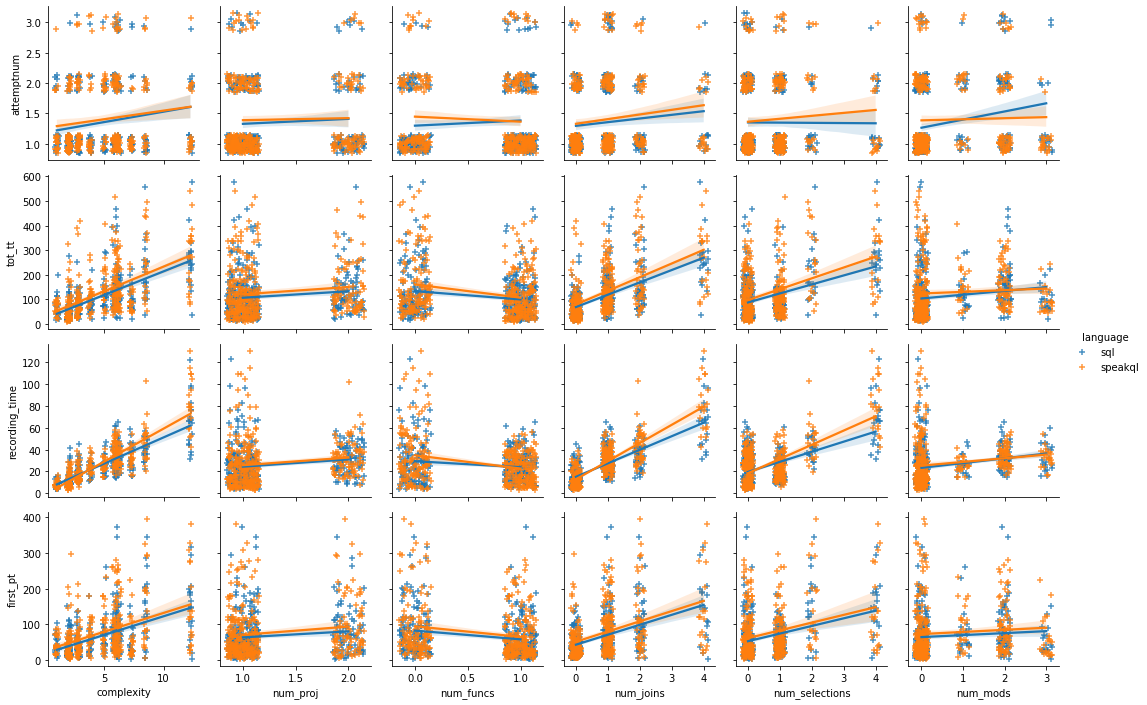

In [34]:
g = sns.PairGrid(
    df,
    x_vars = ['complexity', 'num_proj', 'num_funcs', 'num_joins', 'num_selections', 'num_mods'],
    y_vars = ['attemptnum', 'tot_tt', 'recording_time', 'first_pt'],
    hue = 'language'
)
g.map_offdiag(sns.regplot, x_jitter = .15, y_jitter = .15, marker = '+')
g.add_legend()

## Plots of average number of attempts by query

**Both Dialects:**

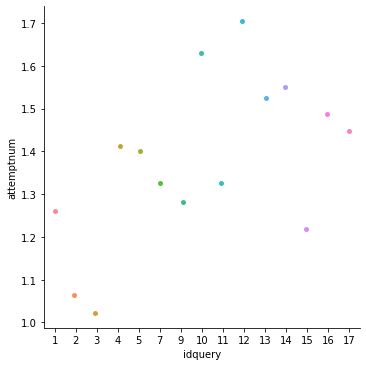

In [35]:
avg_attempts = df[['idquery', 'attemptnum']].groupby('idquery').mean().reset_index()
sns.catplot(x = 'idquery', y = 'attemptnum', data = avg_attempts)

**SQL:**

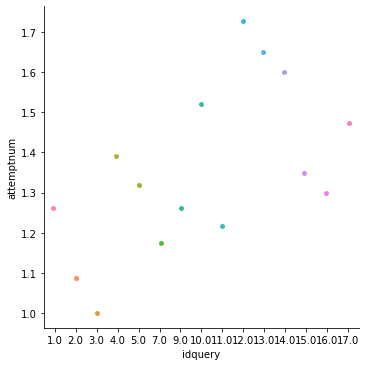

In [36]:
sql_avg_attempts = df.where(
    df.language == 'sql'
).dropna(how = 'all')[['idquery', 'attemptnum']].groupby('idquery').mean().reset_index()
sns.catplot(x = 'idquery', y = 'attemptnum', data = sql_avg_attempts)

**SpeakQL:**

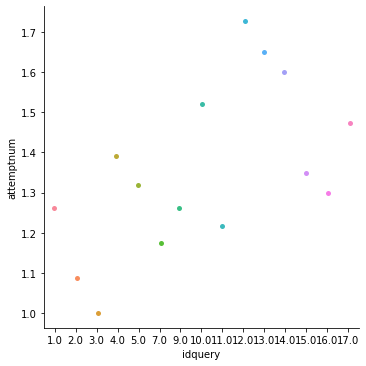

In [37]:
speakql_avg_attempts = df.where(
    df.language == 'speakql'
).dropna(how = 'all')[['idquery', 'attemptnum']].groupby('idquery').mean().reset_index()
sns.catplot(x = 'idquery', y = 'attemptnum', data = sql_avg_attempts)

### Box and Whisker of total planning time by language

<AxesSubplot:xlabel='idquery', ylabel='tot_pt'>

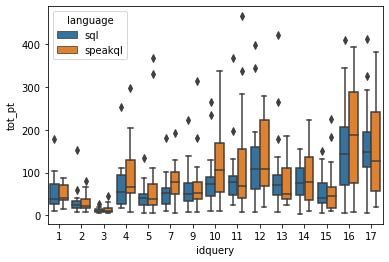

In [38]:
sns.boxplot(x = 'idquery', y = 'tot_pt', data = df, hue = 'language')

### Box and Whisker of total time (planning + recording for all attempts) by language and query

<AxesSubplot:xlabel='idquery', ylabel='tot_tt'>

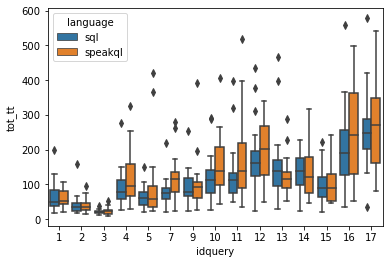

In [39]:
sns.boxplot(x = 'idquery', y = 'tot_tt', data = df, hue = 'language')

### Box and Whisker of time by language and number of joins

<AxesSubplot:xlabel='num_joins', ylabel='tot_tt'>

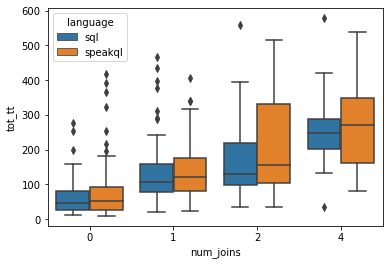

In [40]:
sns.boxplot(x = 'num_joins', y = 'tot_tt', data = df, hue = 'language')

**First attempt planning time:**

<AxesSubplot:xlabel='num_joins', ylabel='first_pt'>

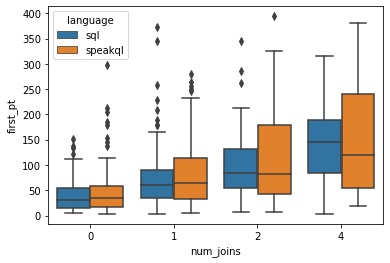

In [41]:
sns.boxplot(x = 'num_joins', y = 'first_pt', data = df, hue = 'language')

**Recording time:**

<AxesSubplot:xlabel='num_joins', ylabel='recording_time'>

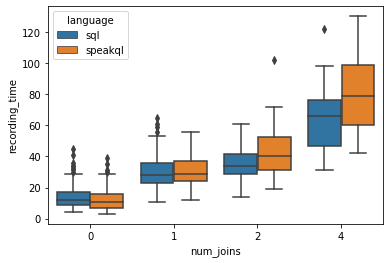

In [42]:
sns.boxplot(x = 'num_joins', y = 'recording_time', data = df, hue = 'language')

### Plot of attempt nums by number of joins

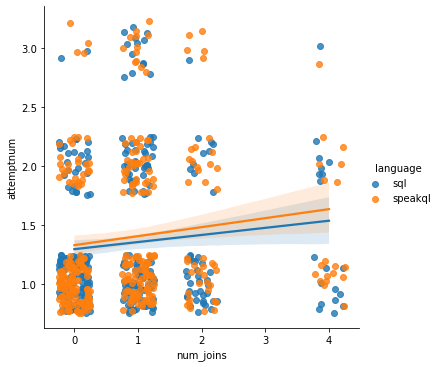

In [43]:
sns.lmplot(data = df, x = 'num_joins', y = 'attemptnum', x_jitter = .25, y_jitter = .25, hue = 'language')

### Plots of attempt nums (y) by overall complexity (x)

In [44]:
df.columns

Index(['idparticipant', 'idsession', 'idattemptsubmission', 'idquery',
       'idstep', 'attemptnum', 'total_time', 'recording_time', 'planning_time',
       'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step', 'speakql_first',
       'language', 'ispractice', 'correct', 'usedspeakql', 'complexity',
       'normalized', 'is_complex', 'num_mods', 'num_joins', 'num_funcs',
       'num_proj', 'num_tables', 'num_selections', 'used_unbundling',
       'unbundling_possible', 'used_natural_functions',
       'natural_functions_possible', 'used_mod_ordering',
       'mod_ordering_possible', 'used_expression_ordering',
       'expression_ordering_possible', 'used_synonyms', 'synonyms_possible'],
      dtype='object')

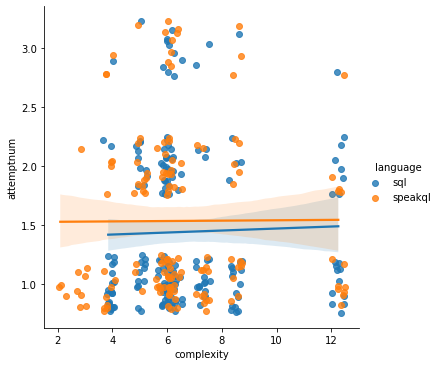

In [52]:
sns.lmplot(
    data = df.query(
        "(language == 'sql' and num_tables > 1) or used_unbundling == 1"
    ), 
    x = 'complexity', 
    y = 'attemptnum', 
    x_jitter = .25, 
    y_jitter = .25, 
    hue = 'language'
)

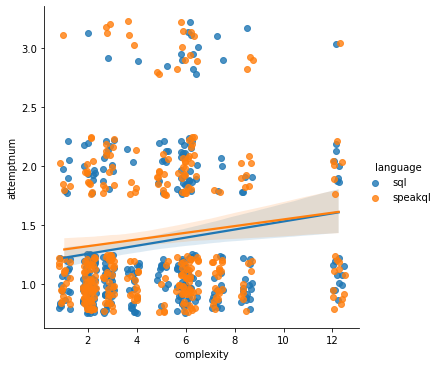

In [53]:
sns.lmplot(
    data = df, 
    x = 'complexity', 
    y = 'attemptnum', 
    x_jitter = .25, 
    y_jitter = .25, 
    hue = 'language'
)